<a href="https://colab.research.google.com/github/Siarzis/ai-tutor/blob/main/lfc_disturbance_prediction_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [7]:
import pandas as pd

import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset

Load and plot the training data

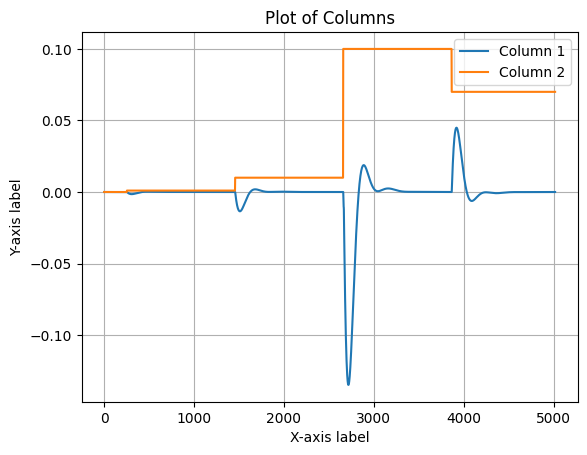

In [5]:
train_dataset_df = pd.read_csv('train_dataset.csv')

plt.figure()
plt.plot(train_dataset_df.iloc[:, 1], label='Column 1')
plt.plot(train_dataset_df.iloc[:, 2], label='Column 2')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Plot of Columns')
plt.legend()
plt.grid(True)
plt.show()

Data preprocess

In [13]:
X_train = train_dataset_df.iloc[:, 1].to_numpy()
y_train = train_dataset_df.iloc[:, 2].to_numpy()

print(X_train)

[ 0.0000e+00  0.0000e+00  0.0000e+00 ... -4.4839e-06 -4.4616e-06
 -4.4392e-06]


In [12]:
class CustomDataset(Dataset):
    def __init__(self, inputs, outputs):
        self.inputs = torch.tensor(inputs)
        self.outputs = torch.tensor(outputs)

    def __len__(self):
        return len(self.inputs)  # Assuming all arrays have the same length

    def __getitem__(self, index):
        sample = tuple((self.inputs[index], self.outputs[index]))
        return sample


train_dataset_tensor = CustomDataset(train_dataset_df.iloc[:, 1].to_numpy(), train_dataset_df.iloc[:, 2].to_numpy())

print(train_dataset_tensor[0])


(0.0, 0.0)
